# Class 1

In [164]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

### Q1. How to delete duplicates in Python?

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter

In [35]:
# create a data frame with duplicates
raw_data = {'first_name': ['Jason', 'Jason', 'Faye', 'Jake', 'Doris'],
        'last_name': ['Miller', 'Miller', 'Liang', 'Milner', 'Cooze'],
        'age': [42, 42, 29, 24, 73],
        'preTestScore': [4, 4, 31, 2, 3],
        'postTestScore': [25, 25, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
print df

  first_name last_name  age  preTestScore  postTestScore
0      Jason    Miller   42             4             25
1      Jason    Miller   42             4             25
2       Faye     Liang   29            31             57
3       Jake    Milner   24             2             62
4      Doris     Cooze   73             3             70


In [33]:
# remove the duplicates and keep the last record
print df.drop_duplicates(keep = "last")

  first_name last_name  age  preTestScore  postTestScore
1      Jason    Miller   42             4             25
2       Faye     Liang   29            31             57
3       Jake    Milner   24             2             62
4      Doris     Cooze   73             3             70


### Q2.You are given two tables：friend_request and request_accepted. 
Friend_request table contains requester_id, time and sent_to_id;  request_accepted table contains time, acceptor_id and requester_id. How will you determine the overall acceptance rate of requests?

#### a. Python solution

In [ ]:
#join the two tables
df = pd.merge(friend_request, request_accepted, on = 'requester_id', how = 'left', indicator = 'Exist', suffixes = ['_request', '_accepted']) 
df['Exist'] = np.where(df.Exist == 'both', True, False)
acceptance_rate = len(df[df.Exist == True])/len(df)

####  b.SQL solution

In [ ]:
SELECT 
COUNT(a.is_accepted = TRUE)/COUNT(*) acceptance_rate
FROM
(
    SELECT 
    IF(at.request_id IS NULL, FALSE , TRUE) is_accepted
    FROM request_table rt
    LEFT JOIN accepted_table at 
    ON rt.request_id = at.request_id
) a

### Q3. Do some research and summarize the business model of your dream company, or company that you interview with?
- What is the product？
- Who  are the customer？
- How do they make money
- Why do you want to work for this company?
- (Optional)If you were CEO, what would you do to increase company’s revenue in the next 5 years?

#### 1. Overview: 
Houzz is the leading online platform for providing interior design ideas for home improvement and design. It helps the users in design demand to connect and collaborate with design-focused professionals, and sell products online like an e-commerce site at the same time.

#### 2. What is the product?
The platform (website) is the product.

#### 3. Who are the customer?
The users in design demands and design professionals are both customers.

#### 4. How do they make money?
Houzz earns money through:
a. advertising revenues of products from major merchants, like Ikea and etc.
b. premium listing of professionals (designer, architects and who want to be more easily discovered by Houzz users/potential clients.
c. e-commerce commissions for operating an online marketplace that lets users order products that they find appealing.

#### 5. Why do you want to work for this company? 
Personally speaking, I am an addict to home design stuffs, so I am pretty interested in what is doing at Houzz. 
I personally have some knowledge of home design ideas and want to apply them to the company.
Then Houzz is a pretty "healthy" company. It stresses healthy workplace environment and work-life balance which is exceedingly rare for a startup company. I highly appreciate the culture Houzz holds and want to grow with the company together.
Finally, as a private company, the company has many opportunities to grow. It can enlarge its market share by adding up new features, even it can serve the community to make a difference to the lifestyle of them.

#### 6. (Optional)If you were CEO, what would you do to increase company’s revenue in the next 5 years? 
According to the business model, the most important for Houzz to increase revenue is to enlarge the potential users of the website and increase sales in the marketplace.
a. User Increases
The problem Houzz might meet today is that only the persons who prepare to remodel houses or buying new houses find 
the need to visit Houzz. This largly limits the influential of Houzz among the potential users. I might change this situaition by adding new features or functions to Houzz. 
First, we could commend design by theme in terms of holidays, occasions and etc. Because these events occurs much more frequently than remodeling, then this new festures might attrack users to visit our website more frequently.
Seeond, the website just commend home designs by rooms now, like categorized by living room, bedroom and etc. It could be the case that the potential customers/uesers just want to remodel a conor or an aera instead of the whole rooms, or the case that they are financially constrained to remodel the whole room. In thess situaitons, we might gain more users/consumers by providing ideas of the cornor designs or split the whole room designs into several steps making the users able to realize their DIY home design step by step.
b. Increase Maketplace Revenues
As to this part, we could increase sales via computing which departments the customers consumed most in the past and conduct a customer segmentation. Then target different groups through different strategies.   

# Class 2

### Q1. Similarly to  PrintDailyTimeSeries () in the sample code, write a Python function called PrintCumulativeTimeSeries() . 
Specifically:
The function takes three  inputs :
- experiment_id
- country
- vertical
The function produces two outputs :
- A time series chart showing the cumulative uplift (hint: search for cumsum)
- Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %

In [10]:
# load data frame
dir = '/Users/faye/Documents/orders_new.csv'
my_data = open(dir)
my_data = pd.read_csv(my_data)
my_data['date'] = pd.to_datetime(my_data['date']) # convert date column to datatime 
print my_data.head(5)

  country       date  experiment_id              order_id  spend_usd  \
0      US 2017-04-02       12624549   6720123150182430132      49.99   
1      US 2017-04-01       12624549  17511438899767627798       0.99   
2      US 2017-04-04       12624549   1549342062436664018      39.99   
3      US 2017-04-04       12624549   7771425263197855716      19.99   
4      US 2017-04-01       12624549  17943210556580942992      19.99   

               user_id      vertical  
0  3659561261588336546  ANDROID_APPS  
1  3659561261588336546  ANDROID_APPS  
2  3659561261588336546  ANDROID_APPS  
3  3659561261588336546  ANDROID_APPS  
4  3659561261588336546  ANDROID_APPS  


In [5]:
# find out all experiment_ids
exp_id = np.unique(my_data.experiment_id)
print exp_id

[12624548 12624549]


In [6]:
# define GetSeries functions to get the desired series
def GetSeries(df, my_id, country, tunnel):
    table = df[['date', 'spend_usd']][(df.vertical == tunnel) 
                                      & (df.experiment_id == my_id) 
                                      & (df.country == country)]
    series = table['spend_usd'].groupby(table['date']).sum()
    series = series.cumsum()
    return(series)

In [22]:
def PlotSeries(experiment_series, control_series, country, tunnel):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = experiment_series.index.tolist(),
        columns = ["experiment", "control"]
    )
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    axes[0].plot(experiment_series, 'r-', label = 'experiment', marker = 'd')
    axes[0].plot(control_series, 'b-', label = 'control', marker = '^')
    axes[0].set_title('Experiment vs Control (%2s, %12s)' % (country, tunnel), fontsize = 15)
    axes[0].set_ylabel('Cumulative Spend_USD', fontsize = 15)
    axes[0].set_xlabel('Date', fontsize = 15)
    
    def dollar(x, pos):
        return '$%1.0f' % x
    
    formatter = FuncFormatter(dollar)
    axes[0].yaxis.set_major_formatter(formatter)

    axes[0].legend(fontsize = 12)
    axes[0].grid(linestyle = '--')
    
    df['Discrency'] = (df.experiment - df.control)/df.control
    df.drop(['experiment'], axis = 1, inplace = True)
    df.drop(['control'], axis = 1, inplace = True)
    
    axes[1].plot(df, 'g-', marker = 'd')
    axes[1].set_title('Experiment over Control (%2s, %12s)' % (country, tunnel), fontsize = 15)
    axes[1].set_ylabel('Cumulative % Uplift on Revenue', fontsize = 15)
    axes[1].set_xlabel('Date', fontsize = 15)
    vals = axes[1].get_yticks()
    axes[1].set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    axes[1].grid(linestyle = '--')
    
    plt.gcf().autofmt_xdate()
    plt.subplots_adjust(wspace = 0.2)  

In [8]:
def PrintCumulativeTimeSeries(df, experiment_ids, country, tunnel):
    experiment_series = GetSeries(df, experiment_ids[0], country, tunnel)
    control_series = GetSeries(df, experiment_ids[1], country, tunnel)
    PlotSeries(experiment_series, control_series, country, tunnel)  

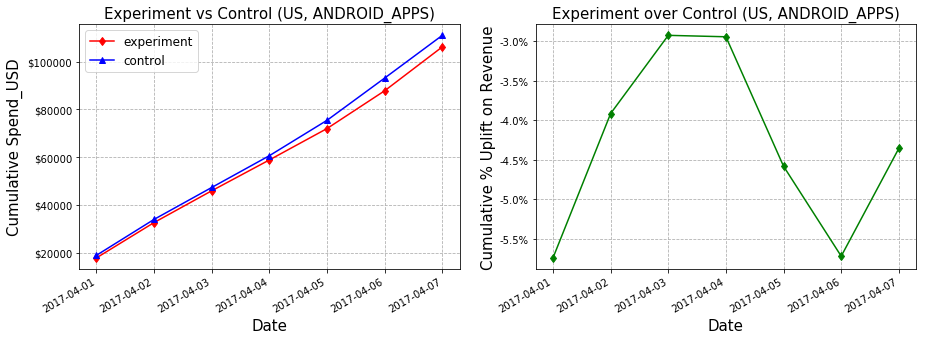

In [23]:
# Apply PrintCumulativeTimeSeries function, setting the country to US and tunnel to Android Apps
# I can compare experiment and control group for other JP or other tunnels by changing the country and tunel args

PrintCumulativeTimeSeries(df = my_data, experiment_ids = exp_id, country = 'US', tunnel = 'ANDROID_APPS')
# it seems that changeing the color of button will decrease the revenue

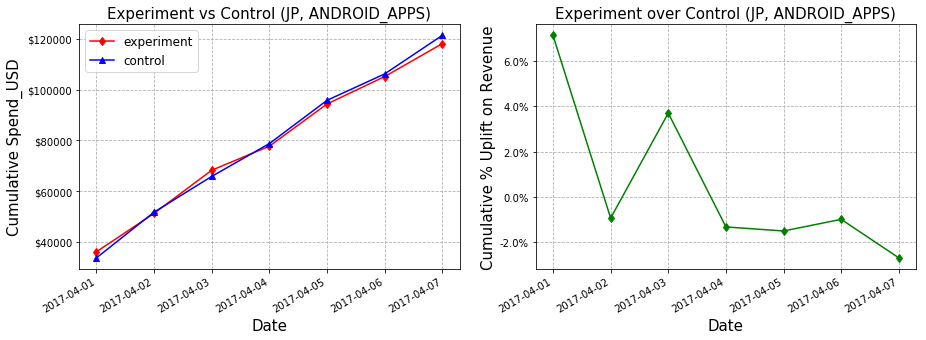

In [24]:
# have a look at the case for JP and Android Apps

PrintCumulativeTimeSeries(df = my_data, experiment_ids = exp_id, country = 'JP', tunnel = 'ANDROID_APPS')
# different from the case in US, via Android Apps.
# the graph reveals that swiching the button color to red increased revenue at the first but underperformed the control
# group from 2017-04-04

### Q2. Using our data, draw a histogram which plots both US and JP data on the same plot.

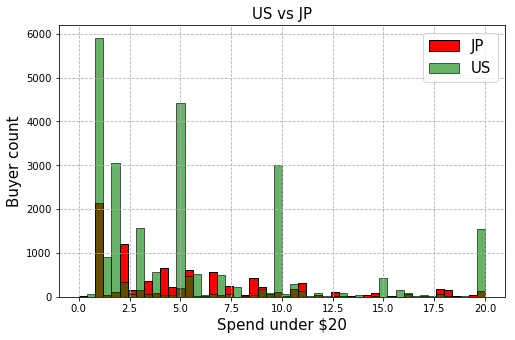

In [25]:
# read file and play with data
file_dir = '/Users/faye/documents/orders_new.csv'
my_data = open(file_dir)
my_data = pd.read_csv(my_data)
my_series_jp = my_data["spend_usd"][(my_data.country == "JP") & (my_data.spend_usd < 20)]
my_series_us = my_data["spend_usd"][(my_data.country == "US") & (my_data.spend_usd < 20)]


# create fig, ax
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(my_series_jp, color = "red", bins = 50, alpha = 1, edgecolor = 'black')
ax.hist(my_series_us, color = 'green', bins = 50, alpha = 0.6, edgecolor = 'black')

# set title 
ax.set_title("US vs JP", fontsize = 15)
ax.set_ylabel("Buyer count", fontsize = 15)
ax.set_xlabel("Spend under $20", fontsize = 15)
# set legend
l = plt.legend(fontsize = 15)
l.get_texts()[0].set_text("JP")
l.get_texts()[1].set_text("US")
ax.grid(linestyle = '--')

### Q3.(Optional) Write a function that can plot 10 (instead of 2) time series in our data.

In [ ]:
my_id = np.unique(my_data.experiment_id) # 10 element list

In [ ]:
# GetSeries function remains the same
def GetSeries(df, my_id, country, tunnel):
    table = df[['date', 'spend_usd']][(df.vertical == tunnel) 
                                      & (df.experiment_id == my_id) 
                                      & (df.country == country)]
    series = table['spend_usd'].groupby(table['date']).sum()
    series = series.cumsum()
    return(series)

In [ ]:
# a little change on PlotSeries function
def PlotSeries10(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(group1, c = 'red', linestyle = '--', label = 'group1')
    ax.plot(group2, c = 'blue', linestyle = '--', label = 'group2')
    ax.plot(group3, c = 'black', linestyle = '--', label = 'group3')
    ax.plot(group4, c = 'green', linestyle = '--', label = 'group4')
    ax.plot(group5, c = 'pink', linestyle = '--', label = 'group5')
    ax.plot(group6, c = 'orchid', linestyle = '--', label = 'group6')
    ax.plot(group7, c = 'salmon', linestyle = '--', label = 'group7')
    ax.plot(group8, c = 'gold', linestyle = '--', label = 'group8')
    ax.plot(group9, c = 'steelblue', linestyle = '--', label = 'group9')
    ax.plot(group10, c = 'olive', linestyle = '--', label = 'group10')
    
    ax.set_title('Spend among Groups', fontsize = 15)
    ax.set_ylabel('Cumulative Spend_USD', fontsize = 15)
    ax.set_xlabel('Date', fontsize = 15)
    
    ax.legend()
    
    # format Cumulative Spend_USD
    def dollar(x, pos):
        return '$%1.0f' % x
    formatter = FuncFormatter(dollar)
    ax.yaxis.set_major_formatter(formatter)

    plt.gcf().autofmt_xdate()

In [ ]:
def PrintCumulativeTimeSeries10(df, experiment_ids, country, tunnel):
    group1 = GetSeries(df, experiment_ids[0], country, tunnel)
    group2 = GetSeries(df, experiment_ids[1], country, tunnel)
    group3 = GetSeries(df, experiment_ids[2], country, tunnel)
    group4 = GetSeries(df, experiment_ids[3], country, tunnel)
    group5 = GetSeries(df, experiment_ids[4], country, tunnel)
    group6 = GetSeries(df, experiment_ids[5], country, tunnel)
    group7 = GetSeries(df, experiment_ids[6], country, tunnel)
    group8 = GetSeries(df, experiment_ids[7], country, tunnel)
    group9 = GetSeries(df, experiment_ids[8], country, tunnel)
    group10 = GetSeries(df, experiment_ids[9], country, tunnel)
# better solution： for loop
    PlotSeries(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)  

In [ ]:
PrintCumulativeTimeSeries10(my_data, my_id, 'US', 'ANDROID_APPS')